In [97]:
!pip install wget wfdb neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json'

kaggle.json
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [100]:
!kaggle datasets download -d bjoernjostein/george-moody-2023-complete-dataset

george-moody-2023-complete-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [158]:
!pip install GitPython
from git import Repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00


In [159]:
HTTPS_REMOTE_URL = 'https://github.com/Bsingstad/python-example-2023.git'
DEST_NAME = 'repo'
cloned_repo = Repo.clone_from(HTTPS_REMOTE_URL, DEST_NAME)

In [171]:
from repo.helper_code import *

In [273]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

font = {'size'   : 16}

matplotlib.rc('font', **font)

In [274]:
dir_name = "./"
extension = ".zip"
 
os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

BadZipFile: ignored

In [275]:
os.rename("./i-care-international-cardiac-arrest-research-consortium-database-1.0/", "./data/")

FileNotFoundError: ignored

In [276]:
print("Total number of patients in training set: ", len(os.listdir("./data/training/")))

Total number of patients in training set:  607


In [277]:
cnt = 0
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".mat"):
        cnt +=1
print("Total number of recordings: ", cnt)

Total number of recordings:  23528


In [278]:
num_rec = []
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".mat"):
        num_rec.append(os.path.join(root, name).split("/")[-2])
num_rec = np.asarray(num_rec)
_, num_rec_pr_pat = np.unique(num_rec, return_counts=True)

In [279]:
num_rec.shape

(23528,)

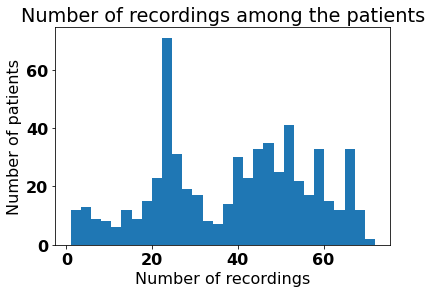

In [280]:
plt.hist(num_rec_pr_pat, bins=30)
plt.xlabel("Number of recordings")
plt.ylabel("Number of patients")
plt.title("Number of recordings among the patients")
plt.show()

In [281]:
df = 0
cnt = 0
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".tsv"):
        df_temp = pd.read_csv(os.path.join(root, name), sep="\t").dropna()
        if cnt == 0:
          df = df_temp
        else:
          df = pd.concat([df,df_temp])
        cnt+=1

In [282]:
df.head()

,Hour,Time,Quality,Record
34,35,34:55,1.0,ICARE_0829_35
35,36,35:55,1.0,ICARE_0829_36
36,37,36:55,1.0,ICARE_0829_37
37,38,37:35,1.0,ICARE_0829_38
38,39,38:55,1.0,ICARE_0829_39


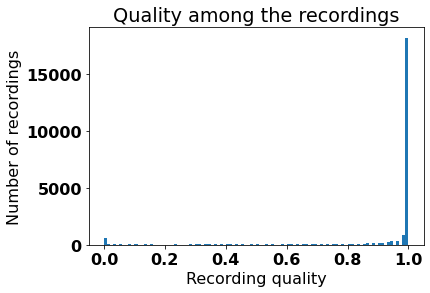

In [283]:
plt.hist(df["Quality"], bins=100)
plt.xlabel("Recording quality")
plt.ylabel("Number of recordings")
plt.title("Quality among the recordings")
plt.show()

In [284]:
print("Number of signals with quality equal to 1.0 = ", np.where(df["Quality"] == 1.0)[0].shape[0])
print("Percent of total signal with quality equal to 1.0 = ", round((np.where(df["Quality"] == 1.0)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality equal to 1.0 =  18235
Percent of total signal with quality equal to 1.0 =  77.5


In [285]:
print("Number of signals with quality less than 1.0 = ", np.where(df["Quality"] != 1.0)[0].shape[0])
print("Percent of total signal with quality less than 1.0 = ", round((np.where(df["Quality"] != 1.0)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 1.0 =  5293
Percent of total signal with quality less than 1.0 =  22.5


In [286]:
print("Number of signals with quality less than 0.75 = ", np.where(df["Quality"] < 0.75)[0].shape[0])
print("Percent of total signal with quality less than 0.75 = ", round((np.where(df["Quality"] < 0.75)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.75 =  2338
Percent of total signal with quality less than 0.75 =  9.94


In [287]:
print("Number of signals with quality less than 0.5 = ", np.where(df["Quality"] < 0.5)[0].shape[0])
print("Percent of total signal with quality less than 0.5 = ", round((np.where(df["Quality"] < 0.5)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.5 =  1756
Percent of total signal with quality less than 0.5 =  7.46


In [288]:
print("Number of signals with quality less than 0.25 = ", np.where(df["Quality"] < 0.25)[0].shape[0])
print("Percent of total signal with quality less than 0.25 = ", round((np.where(df["Quality"] < 0.25)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.25 =  1069
Percent of total signal with quality less than 0.25 =  4.54


In [289]:
df["Record"].str.rsplit("_",n=1).str[0]

34    ICARE_0829
35    ICARE_0829
36    ICARE_0829
37    ICARE_0829
38    ICARE_0829
         ...    
57    ICARE_0874
58    ICARE_0874
59    ICARE_0874
60    ICARE_0874
61    ICARE_0874
Name: Record, Length: 23528, dtype: object

In [290]:
df["Patient"] = df["Record"].str.rsplit("_",n=1).str[0]

In [291]:
df.head()

,Hour,Time,Quality,Record,Patient
34,35,34:55,1.0,ICARE_0829_35,ICARE_0829
35,36,35:55,1.0,ICARE_0829_36,ICARE_0829
36,37,36:55,1.0,ICARE_0829_37,ICARE_0829
37,38,37:35,1.0,ICARE_0829_38,ICARE_0829
38,39,38:55,1.0,ICARE_0829_39,ICARE_0829


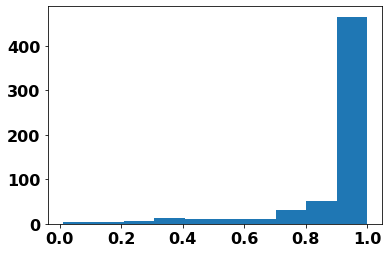

In [292]:
plt.hist(df.groupby("Patient")["Quality"].mean())
plt.show()

In [293]:
patient_data =  load_text_file("/content/data/training/ICARE_0284/ICARE_0284.txt")

In [294]:
patient_data.split("\n")

['Patient: ICARE_0284',
 'Age: 53',
 'Sex: Male',
 'ROSC: nan',
 'OHCA: True',
 'VFib: True',
 'TTM: 33',
 'Outcome: Good',
 'CPC: 1',
 '']

In [295]:
get_outcome(patient_data)

0

In [296]:
patient = []
age = []
sex = []
rosc = []
ohca = []
vfib = []
ttm = []
outcome = []
outcome_prob = []
cpc = []

for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".txt"):
        patient_data = load_text_file(os.path.join(root, name))
        patient.append(get_patient_id(patient_data))
        age.append(get_age(patient_data))
        sex.append(get_sex(patient_data))
        rosc.append(get_rosc(patient_data))
        ohca.append(get_ohca(patient_data))
        vfib.append(get_vfib(patient_data))
        ttm.append(get_ttm(patient_data))
        outcome.append(get_outcome(patient_data))
        #outcome_prob.append(get_outcome_probability(patient_data))
        cpc.append(get_cpc(patient_data))
patient = np.asarray(patient)
age = np.asarray(age)
sex = np.asarray(sex)
rosc = np.asarray(rosc)
ohca = np.asarray(ohca)
vfib = np.asarray(vfib)
ttm = np.asarray(ttm)
outcome = np.asarray(outcome)
outcome_prob =np.asarray(outcome_prob)
cpc = np.asarray(cpc)

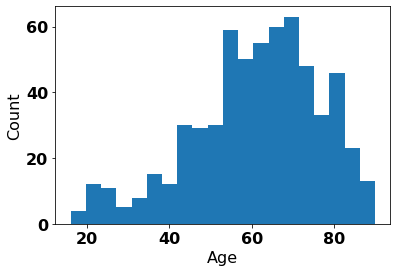

In [297]:
plt.hist(age, bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [298]:
label, value = np.unique(sex, return_counts=True)

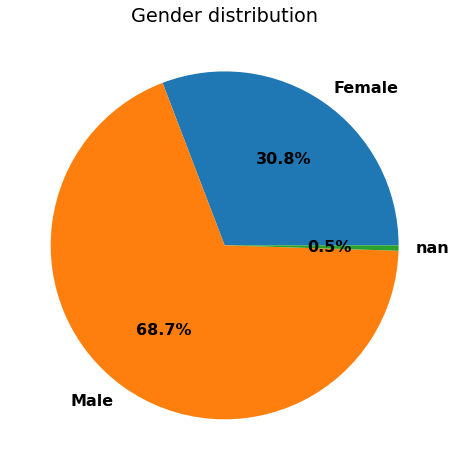

In [299]:
plt.figure(figsize=(8,8))
plt.title("Gender distribution")
plt.pie(value, labels = label, autopct='%1.1f%%')
plt.show()

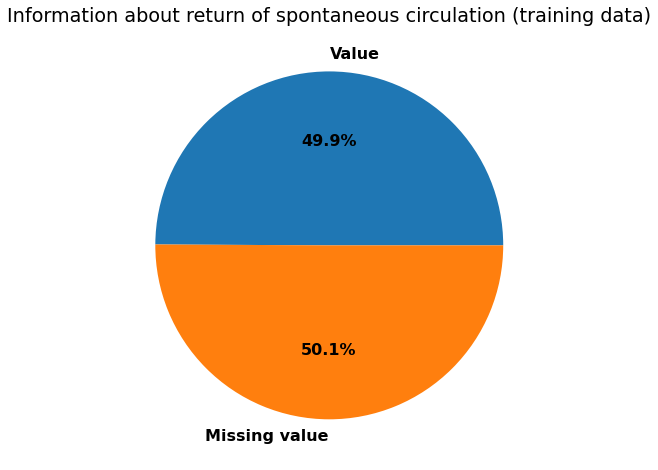

In [300]:
plt.figure(figsize=(8,8))
plt.title("Information about return of spontaneous circulation (training data)")
lab,cnt = np.unique(np.isnan(rosc)*1,return_counts=True)
plt.pie(cnt,labels=["Value","Missing value"],autopct='%1.1f%%')
plt.show()

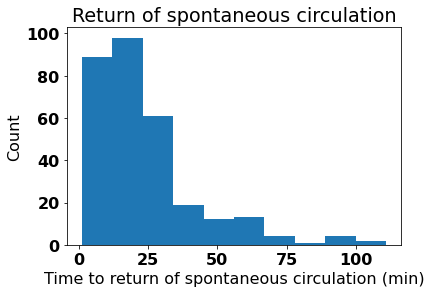

In [301]:
plt.title("Return of spontaneous circulation")
plt.hist(rosc)
plt.xlabel("Time to return of spontaneous circulation (min)")
plt.ylabel("Count")
plt.show()

In [302]:
np.unique(ohca,return_counts=True)

(array([ 1., nan]), array([566,  41]))

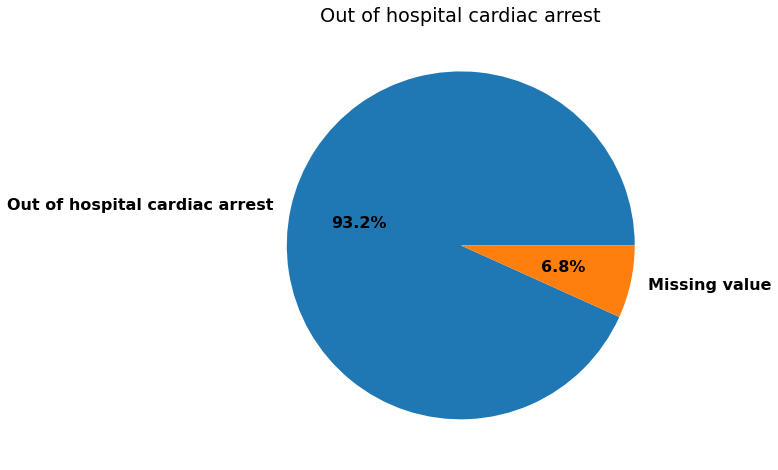

In [303]:
plt.figure(figsize=(8,8))
plt.title("Out of hospital cardiac arrest")
lab,cnt = np.unique(np.isnan(ohca)*1,return_counts=True)
plt.pie(cnt,labels=["Out of hospital cardiac arrest","Missing value"],autopct='%1.1f%%')
plt.show()

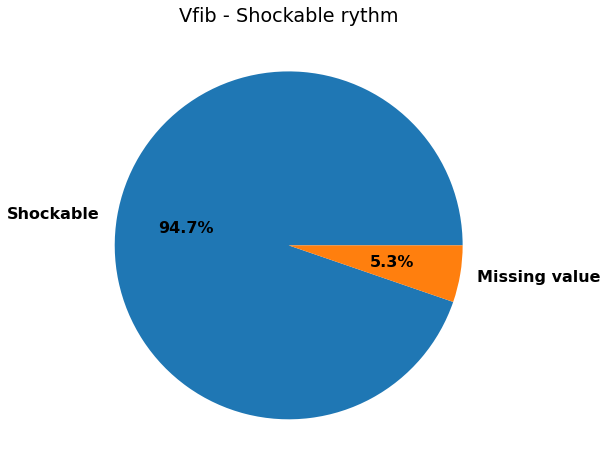

In [304]:
plt.figure(figsize=(8,8))
plt.title("Vfib - Shockable rythm")
lab,cnt = np.unique(np.isnan(vfib)*1,return_counts=True)
plt.pie(cnt,labels=["Shockable","Missing value"],autopct='%1.1f%%')
plt.show()

In [305]:
np.unique(ttm, return_counts=True)

(array([33., 36., nan]), array([448,  61,  98]))

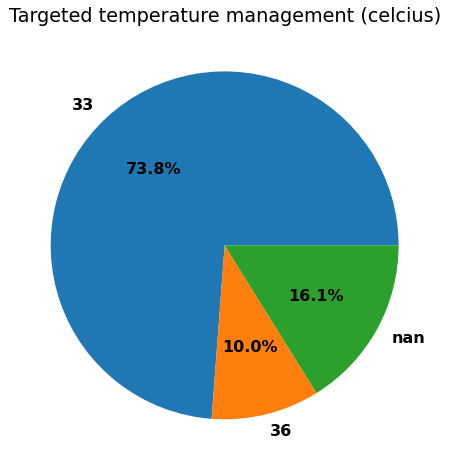

In [306]:
plt.figure(figsize=(8,8))
plt.title("Targeted temperature management (celcius)")
lab,cnt = np.unique(ttm,return_counts=True)
plt.pie(cnt,labels=["33","36","nan"],autopct='%1.1f%%')
plt.show()

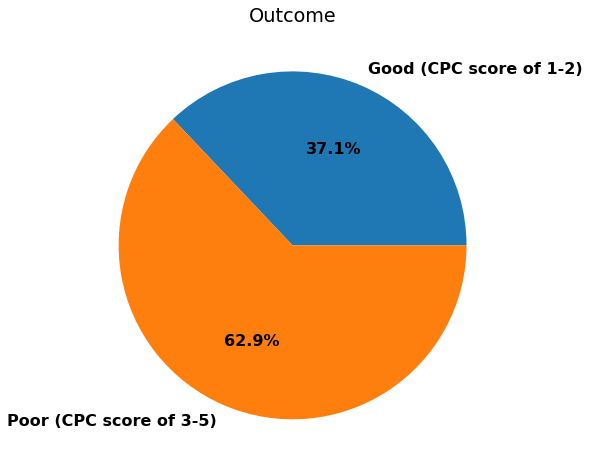

In [307]:
plt.figure(figsize=(8,8))
plt.title("Outcome")
lab,cnt = np.unique(outcome,return_counts=True)
plt.pie(cnt,labels=["Good (CPC score of 1-2)", "Poor (CPC score of 3-5)"],autopct='%1.1f%%')
plt.show()

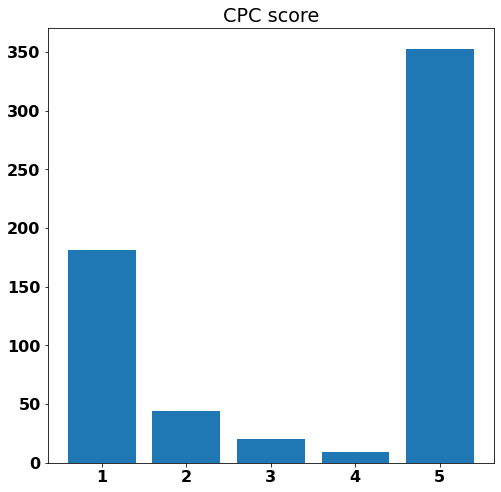

In [308]:
plt.figure(figsize=(8,8))
plt.title("CPC score")
lab,cnt = np.unique(cpc,return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

In [313]:
np.unique(df["Record"].str.rsplit("_",n=1).str[1].astype(int),return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72]),
 array([  3,   6,  24,  54,  94, 150, 175, 189, 214, 240, 266, 281, 298,
        323, 335, 351, 368, 399, 408, 421, 443, 458, 457, 465, 468, 469,
        464, 472, 469, 466, 469, 466, 462, 449, 439, 436, 428, 426, 416,
        418, 417, 415, 404, 401, 386, 382, 369, 357, 355, 340, 331, 323,
        317, 315, 312, 306, 302, 292, 294, 288, 285, 278, 275, 268, 262,
        250, 242, 236, 232, 226, 216, 213]))

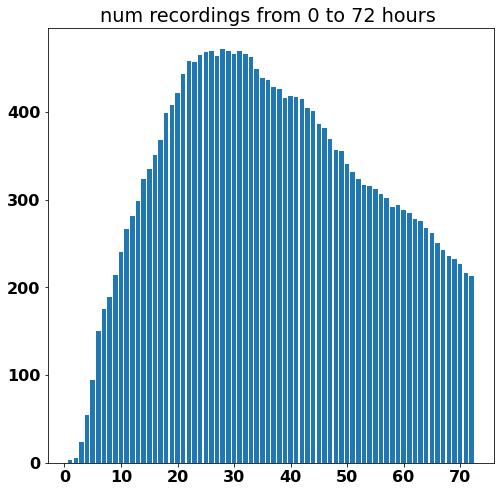

In [314]:
plt.figure(figsize=(8,8))
plt.title("num recordings from 0 to 72 hours ")
lab,cnt = np.unique(df["Record"].str.rsplit("_",n=1).str[1].astype(int),return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

In [317]:
timeslots = np.asarray([(0,12),(12,24),(24,48),(48,72)])

In [332]:
rec_after_time = np.zeros((timeslots.shape[0],607))
for num,i in enumerate(timeslots):
  cnt = 0
  for root, dirs, files in os.walk("./data/training/"):
    for name in files:
        if os.path.join(root, name).endswith(".tsv"):
          df_temp = pd.read_csv(os.path.join(root, name), sep="\t")
          rec_after_time[num,cnt] = df_temp[i[0]:i[1]].dropna().shape[0]
          cnt+=1

## 0 to 12 hours

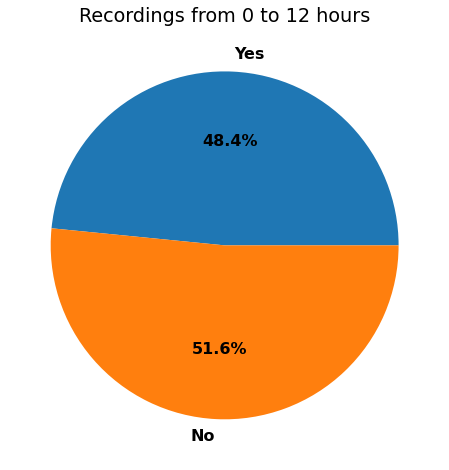

In [340]:
plt.figure(figsize=(8,8))
plt.title("Recordings from 0 to 12 hours")
lab,cnt = np.unique(rec_after_time[0] == 0,return_counts=True)
plt.pie(cnt,labels=["Yes", "No"],autopct='%1.1f%%')
plt.show()

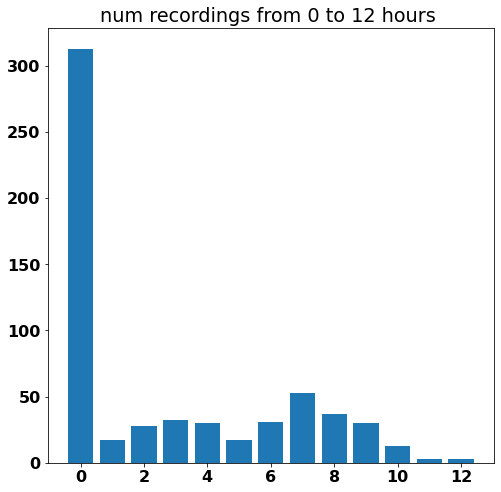

In [336]:
plt.figure(figsize=(8,8))
plt.title("num recordings from 0 to 12 hours")
lab,cnt = np.unique(rec_after_time[0],return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

## 12 to 24 hours

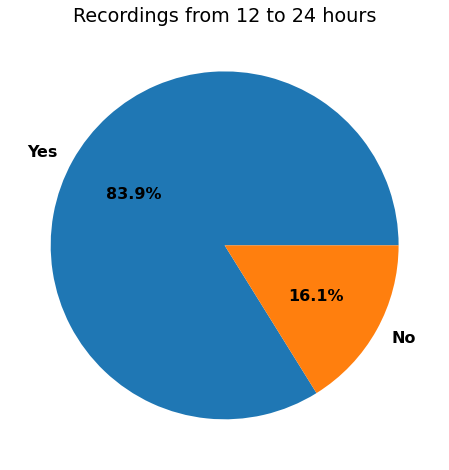

In [342]:
plt.figure(figsize=(8,8))
plt.title("Recordings from 12 to 24 hours")
lab,cnt = np.unique(rec_after_time[1] == 0,return_counts=True)
plt.pie(cnt,labels=["Yes", "No"],autopct='%1.1f%%')
plt.show()

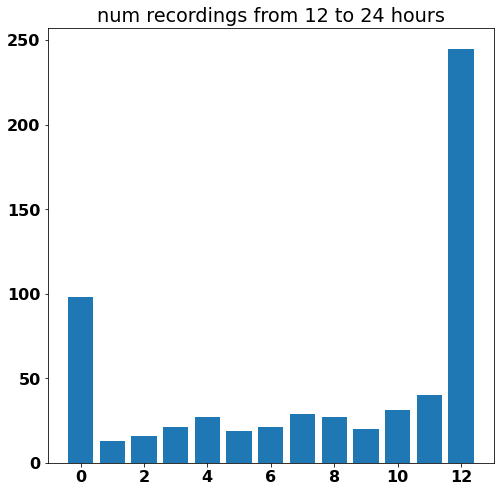

In [358]:
plt.figure(figsize=(8,8))
plt.title("num recordings from 12 to 24 hours")
lab,cnt = np.unique(rec_after_time[1],return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

## 24 to 48 hours

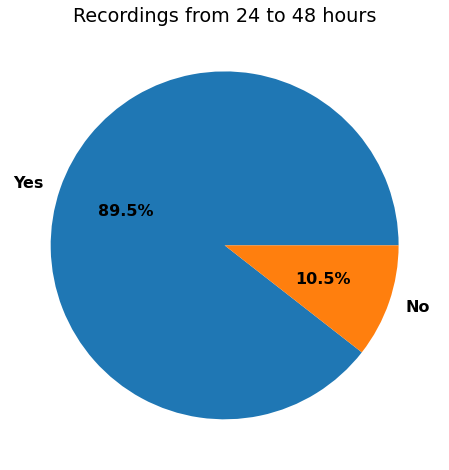

In [346]:
plt.figure(figsize=(8,8))
plt.title("Recordings from 24 to 48 hours")
lab,cnt = np.unique(rec_after_time[2] == 0,return_counts=True)
plt.pie(cnt,labels=["Yes", "No"],autopct='%1.1f%%')
plt.show()

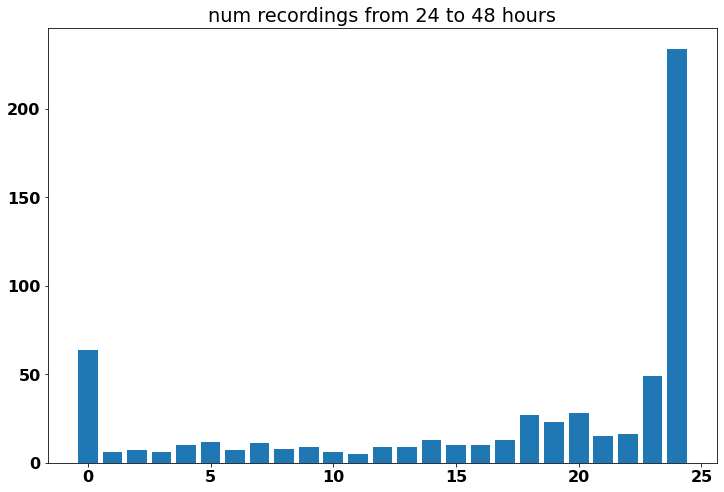

In [357]:
plt.figure(figsize=(12,8))
plt.title("num recordings from 24 to 48 hours")
lab,cnt = np.unique(rec_after_time[2],return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

## 48 to 72 hours

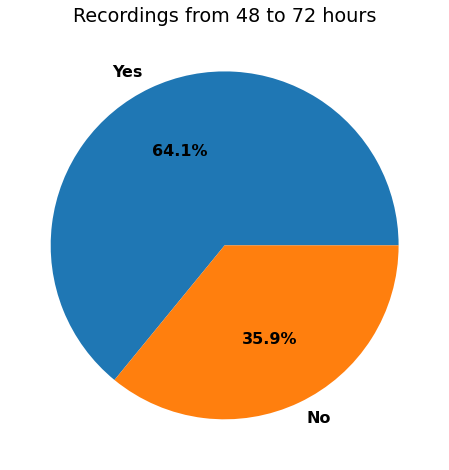

In [353]:
plt.figure(figsize=(8,8))
plt.title("Recordings from 48 to 72 hours")
lab,cnt = np.unique(rec_after_time[3] == 0,return_counts=True)
plt.pie(cnt,labels=["Yes", "No"],autopct='%1.1f%%')
plt.show()

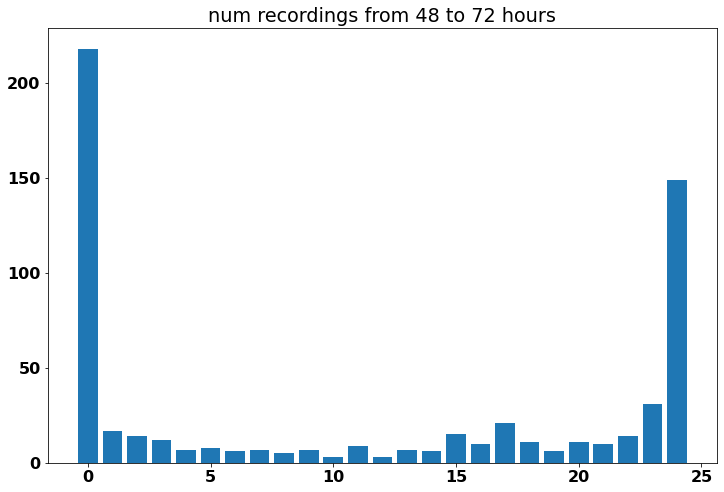

In [356]:
plt.figure(figsize=(12,8))
plt.title("num recordings from 48 to 72 hours")
lab,cnt = np.unique(rec_after_time[3],return_counts=True)
plt.bar(x=lab , height=cnt)
plt.show()

In [359]:
for num,i in enumerate(timeslots):
  for root, dirs, files in os.walk("./data/training/"):
    for name in files:
        if os.path.join(root, name).endswith(".tsv"):
          df_temp = pd.read_csv(os.path.join(root, name), sep="\t")
          break

In [ ]:

for num,i in enumerate(timeslots):
  for root, dirs, files in os.walk("./data/training/"):
    for name in files:
        if os.path.join(root, name).endswith(".tsv"):
          df_temp = pd.read_csv(os.path.join(root, name), sep="\t")
          df_temp[i[0]:i[1]].dropna()
          

In [363]:
patient_id="ICARE_0874"
data_folder="./data/training/"

In [365]:
patient_metadata, recording_metadata, recording_data = load_challenge_data(data_folder, patient_id)

In [403]:
def get_signal_indx(recording_metadata, task, signal_len = 30):
  """
  task: 0,1,2,3 - 0: 0,12 hours, 1: 12-24 hours, 2: 24-48 hours, 3: 48-72 hours
  signal_len: desired signal lenght to extract from the total signal
  """
  TIMESLOTS = np.asarray([(0,12),(12,24),(24,48),(48,72)])
  time = TIMESLOTS[task]
  valid_signals = pd.read_csv(StringIO(recording_metadata), sep='\t')[time[0]:time[1]].dropna()
  if valid_signals.shape[0] > 0:
    indx = valid_signals["Quality"].argmax()
  else:
    indx = np.nan
  return indx

In [390]:

recording_data[17][0][0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [367]:
recording_metadata

'Hour\tTime\tQuality\tRecord\n01\tnan\tnan\tnan\n02\tnan\tnan\tnan\n03\tnan\tnan\tnan\n04\tnan\tnan\tnan\n05\tnan\tnan\tnan\n06\tnan\tnan\tnan\n07\tnan\tnan\tnan\n08\tnan\tnan\tnan\n09\tnan\tnan\tnan\n10\tnan\tnan\tnan\n11\tnan\tnan\tnan\n12\tnan\tnan\tnan\n13\tnan\tnan\tnan\n14\tnan\tnan\tnan\n15\tnan\tnan\tnan\n16\tnan\tnan\tnan\n17\tnan\tnan\tnan\n18\t17:55\t0.000\tICARE_0874_18\n19\t18:55\t0.817\tICARE_0874_19\n20\t19:45\t1.000\tICARE_0874_20\n21\t20:55\t1.000\tICARE_0874_21\n22\t21:00\t0.983\tICARE_0874_22\n23\t22:20\t0.967\tICARE_0874_23\n24\t23:55\t1.000\tICARE_0874_24\n25\t24:20\t1.000\tICARE_0874_25\n26\t25:25\t1.000\tICARE_0874_26\n27\tnan\tnan\tnan\n28\t27:20\t0.517\tICARE_0874_28\n29\t28:55\t0.000\tICARE_0874_29\n30\t29:55\t0.000\tICARE_0874_30\n31\t30:40\t0.900\tICARE_0874_31\n32\t31:30\t1.000\tICARE_0874_32\n33\t32:20\t0.983\tICARE_0874_33\n34\t33:00\t0.967\tICARE_0874_34\n35\t34:30\t1.000\tICARE_0874_35\n36\t35:55\t1.000\tICARE_0874_36\n37\t36:40\t1.000\tICARE_0874_37\n3

In [402]:
from io import StringIO
pd.read_csv(StringIO(recording_metadata), sep='\t').dropna()["Quality"].argmax()

2

In [361]:
df_temp.dropna()

,Hour,Time,Quality,Record
17,18,17:55,0.000,ICARE_0874_18
18,19,18:55,0.817,ICARE_0874_19
19,20,19:45,1.000,ICARE_0874_20
20,21,20:55,1.000,ICARE_0874_21
21,22,21:00,0.983,ICARE_0874_22
22,23,22:20,0.967,ICARE_0874_23
23,24,23:55,1.000,ICARE_0874_24
24,25,24:20,1.000,ICARE_0874_25
25,26,25:25,1.000,ICARE_0874_26
27,28,27:20,0.517,ICARE_0874_28
